In [1]:
!pip install numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


**Question 1: Linear Regression & Robust Loss**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Step 1: Load Dataset (Table 1)

In [ ]:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)  # x reshaped in one line
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

Step 2: Fit Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

Linear Regression Model: y = -3.56x + 3.92


Step 3: Define Models

In [ ]:
def model1(x):
    #Given model from task 1
    return -4 * x + 12

def model2(x):
    # Dynamic model based on learned regression
    return slope * x + intercept

Step 4: Predict Values

In [ ]:
y_pred_model1 = model1(X.flatten())
y_pred_model2 = model2(X.flatten())

Step 5: Scatter Plot & Regression Line

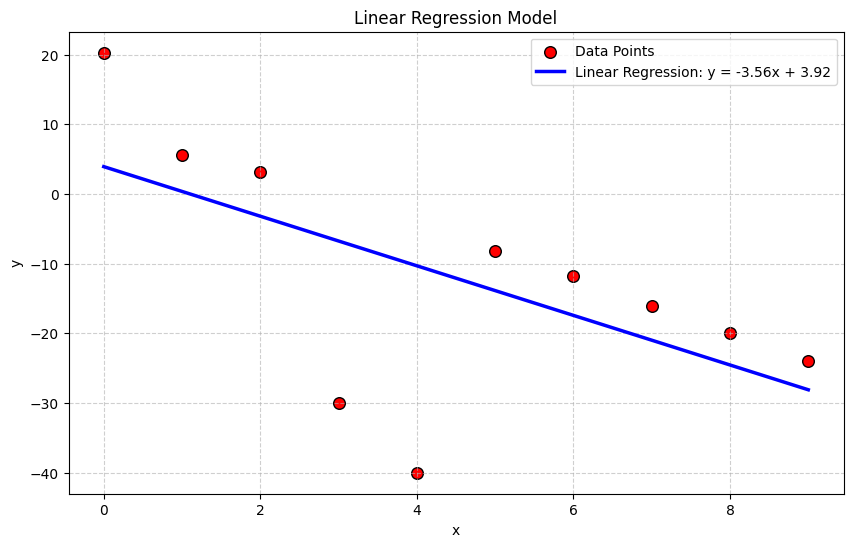

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', s=70, edgecolors='black', label='Data Points')
plt.plot(x, y_pred_model2, color='blue', linewidth=2.5,
         label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Step 6: Define Robust Loss Function

In [ ]:
def robust_loss(y_true, y_pred, beta):
    """
    Computes the robust loss:
    L(θ, β) = (1/N) * Σ [ (error^2) / (error^2 + β^2) ]
    Returns mean loss and per-sample loss
    """
    error = y_true - y_pred
    error_sq = error ** 2
    loss_per_point = error_sq / (error_sq + beta**2)
    mean_loss = np.mean(loss_per_point)
    return mean_loss, loss_per_point

Step 7: Calculate Robust Loss for Different Beta Values

In [ ]:
betas = [1, 1e-6, 1e3]

print("\nRobust Loss Function Results:")
for beta in betas:
    # Calculate robust loss for both models
    loss_model1, _ = robust_loss(y, y_pred_model1, beta)
    loss_model2, _ = robust_loss(y, y_pred_model2, beta)
    
    # Print the results in a friendly format
    print(f"For beta = {beta}:")
    print(f"  - Model 1 loss: {loss_model1:.6f}")
    print(f"  - Model 2 loss: {loss_model2:.6f}\n")


Robust Loss Function Results:
For beta = 1:
  - Model 1 loss: 0.435416
  - Model 2 loss: 0.973247

For beta = 1e-06:
  - Model 1 loss: 1.000000
  - Model 2 loss: 1.000000

For beta = 1000.0:
  - Model 1 loss: 0.000227
  - Model 2 loss: 0.000188



Step 8: Plot Robust Loss vs Beta (log scale)

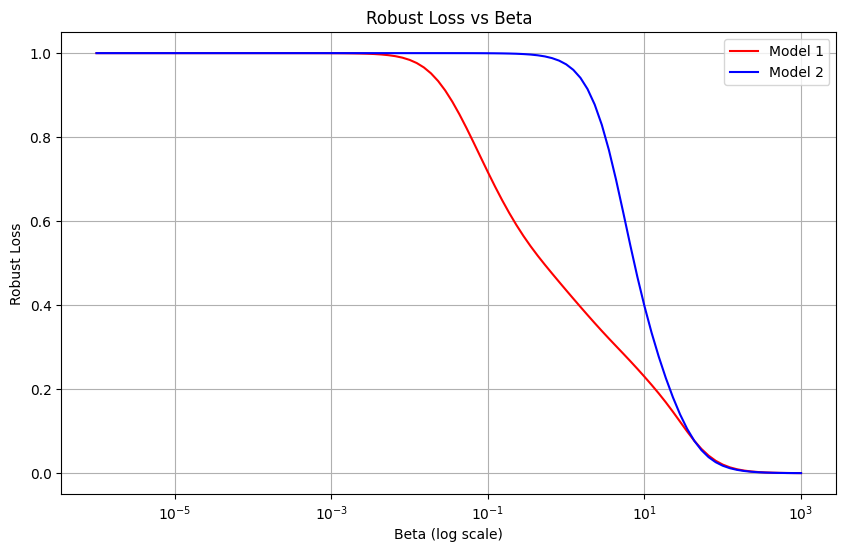

In [ ]:
# === Robust Loss vs β ===
beta_range = np.logspace(-6, 3, 100)
losses1 = [robust_loss(y, y_pred_model1, b)[0] for b in beta_range]
losses2 = [robust_loss(y, y_pred_model2, b)[0] for b in beta_range]

plt.figure(figsize=(12, 5))
plt.semilogx(beta_range, losses1, 'r-', label='Model 1')
plt.semilogx(beta_range, losses2, 'b-', label='Model 2')
plt.axvline(x=chosen_beta, color='black', linestyle='--', label=f'Chosen β={chosen_beta}')
plt.xlabel('β (log scale)')
plt.ylabel('Average Robust Loss')
plt.title('Robust Loss vs β')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 9: Per-sample Loss Values (beta=1)

In [ ]:
chosen_beta = 1

# Calculate per-sample robust losses for both models
_, per_sample_model1 = robust_loss(y, y_pred_model1, chosen_beta)
_, per_sample_model2 = robust_loss(y, y_pred_model2, chosen_beta)

# Create a DataFrame with sample indices for better readability and plotting
df_robust_losses = pd.DataFrame({
    'Sample': np.arange(1, len(y)+1),
    'Model 1 Loss': per_sample_model1,
    'Model 2 Loss': per_sample_model2
})

print(f"\nPer-sample Robust Losses (beta={chosen_beta}):")
print(df_robust_losses)



Per-sample Robust Losses (beta=1):
   Sample  Model 1 Loss  Model 2 Loss
0       1      0.985555      0.996270
1       2      0.851015      0.964996
2       3      0.425155      0.975709
3       4      0.998890      0.998153
4       5      0.999229      0.998867
5       6      0.016619      0.970539
6       7      0.067947      0.970109
7       8      0.006359      0.960081
8       9      0.002494      0.954713
9      10      0.000899      0.943035


Step 10: Summary of Average Robust Losses

In [ ]:
summary_list = []
for beta in betas:
    loss_m1, _ = robust_loss(y, y_pred_model1, beta)
    loss_m2, _ = robust_loss(y, y_pred_model2, beta)
    summary_list.append([beta, loss_m1, loss_m2])

df_summary = pd.DataFrame(summary_list, columns=['Beta', 'Model 1 Avg Loss', 'Model 2 Avg Loss'])
print("\nSummary of Average Robust Losses:")
print(df_summary)


Summary of Average Robust Losses:
          Beta  Model 1 Avg Loss  Model 2 Avg Loss
0     1.000000          0.435416          0.973247
1     0.000001          1.000000          1.000000
2  1000.000000          0.000227          0.000188


Step 11: Choose Best Beta & Compare Models

In [ ]:
loss_m1, _ = robust_loss(y, y_pred_model1, chosen_beta)
loss_m2, _ = robust_loss(y, y_pred_model2, chosen_beta)

print(f"\nAt beta = {chosen_beta}:")
print(f"Model 1 average loss: {loss_m1:.6f}")
print(f"Model 2 average loss: {loss_m2:.6f}")

if loss_m1 < loss_m2:
    print("=> Model 1 fits the data better with this robust loss.")
else:
    print("=> Model 2 fits the data better with this robust loss.")


At beta = 1:
Model 1 average loss: 0.435416
Model 2 average loss: 0.973247
=> Model 1 fits the data better with this robust loss.


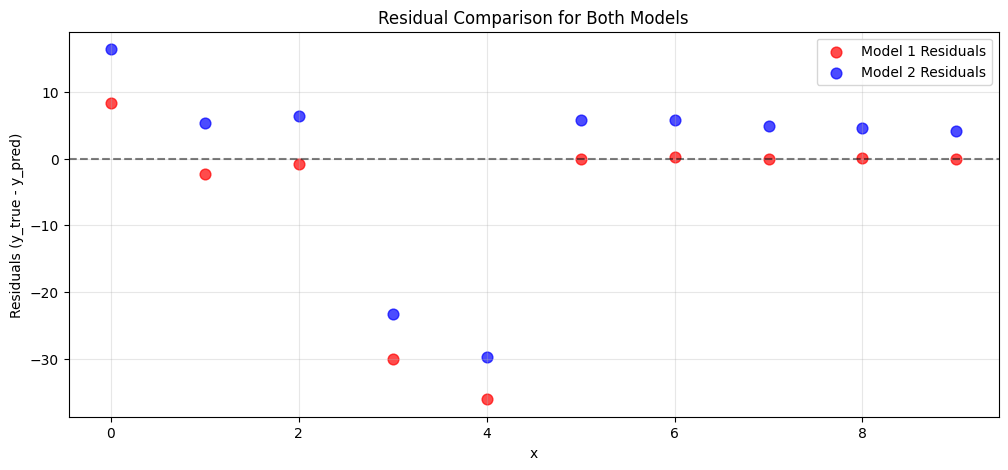

In [ ]:
# Residuals and Errors
error_model1 = y - y_pred_model1
error_model2 = y - y_pred_model2

plt.figure(figsize=(12,5))
plt.scatter(x, error_model1, color='red', alpha=0.7, s=60, label='Model 1 Residuals')
plt.scatter(x, error_model2, color='blue', alpha=0.7, s=60, label='Model 2 Residuals')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals (y_true - y_pred)')
plt.title('Residual Comparison for Both Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

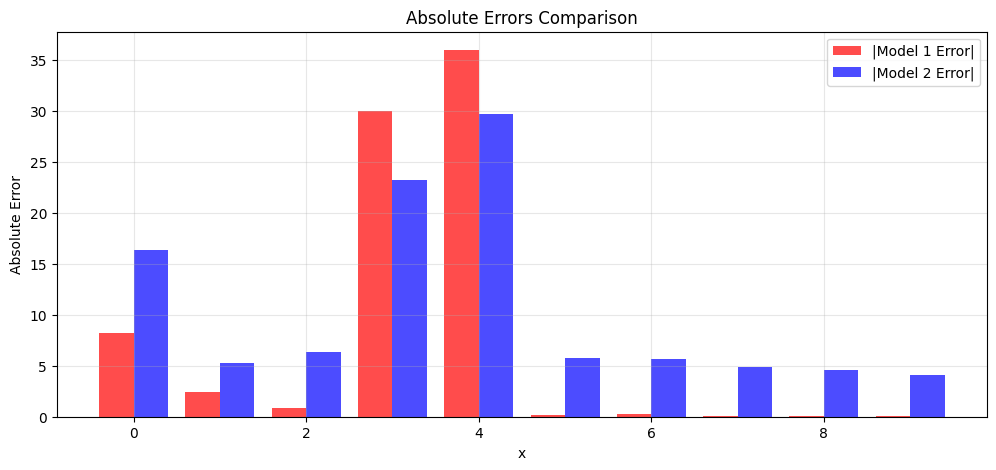

In [44]:
# === Absolute Errors ===
plt.figure(figsize=(12, 5))
plt.bar(x - 0.2, np.abs(error_model1), width=0.4, color='red', alpha=0.7, label='|Model 1 Error|')
plt.bar(x + 0.2, np.abs(error_model2), width=0.4, color='blue', alpha=0.7, label='|Model 2 Error|')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Absolute Errors Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


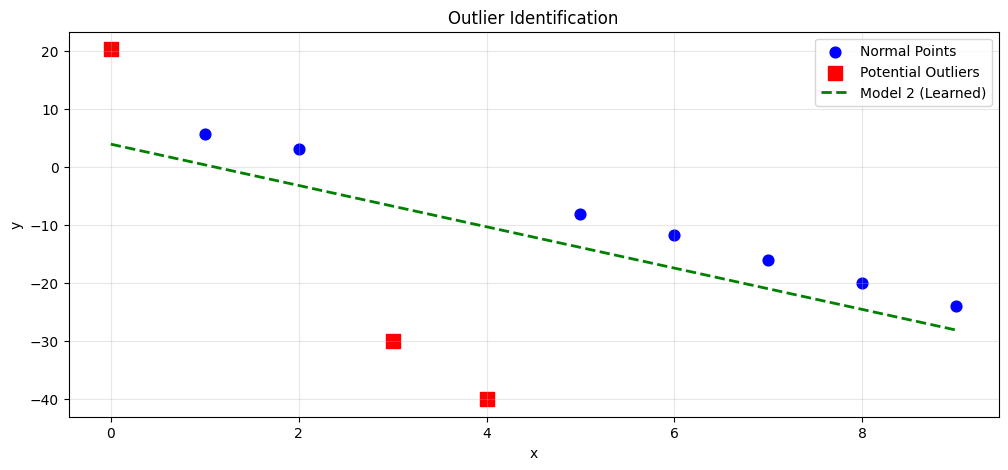

In [ ]:
# === Outlier Identification ===
outlier_threshold = np.percentile(np.abs(error_model2), 75)
outlier_mask = np.abs(error_model2) > outlier_threshold

plt.figure(figsize=(12, 5))
plt.scatter(x[~outlier_mask], y[~outlier_mask], color='blue', s=60, label='Normal Points')
plt.scatter(x[outlier_mask], y[outlier_mask], color='red', s=100, marker='s', label='Potential Outliers')
plt.plot(x, y_pred_model2, 'g--', linewidth=2, label='Model 2 (Learned)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Outlier Identification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()